# Plotting in matplotlib

Matplotlib comes up a lot when discussing plots. It's meant to be similar to matlab plotting, and a significant amount of programmatic control is provided. It provides both a very quick way to visualize data from Python and the flexibility to create publication-quality figures in many formats. We are going to explore matplotlib in interactive mode covering most common cases.

By the end of this file you should be able to:
1. Plot data
2. Adjust plot axes limits or scale
3. Adjust plot style
4. Plot error bars
5. Set and label tickmarks
6. In-depth plot style adjustments
7. Customize via matplotlib rc configuration
8. Plot other types of 2D plots (bar, scatter, box, polar, contour)
9. 3D plots (surface, scatter, line)

Further reading: 
1. http://matplotlib.org/contents.html
2. http://www.scipy-lectures.org/intro/matplotlib 

In [2]:
# Python Imports

# Load matplot lib for display in the ipython or jupyter notebook:
%matplotlib inline

# pyplot provides a procedural interface to the matplotlib object-oriented plotting library.
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

%cd datafiles

C:\Users\bfleischer3\Dropbox\PACE\Projects\Courses\IntroScientificPythonWithJupyter\datafiles


### Basic Plot

Starting with this simple plot, detailed plot formatting will be used to describe how these plots appear.

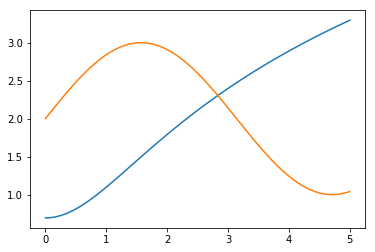

In [3]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

plt.plot(X,Y1)
plt.plot(X,Y2)
plt.show()

### Plot Dimensions

It is possible to set the axes limits and axes dimensions.

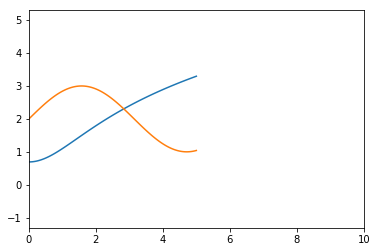

In [4]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

plt.plot(X,Y1)
plt.plot(X,Y2)

# Set axes limits
plt.xlim(X.min()*2, X.max() * 2)
plt.ylim(Y1.min() - 2, Y1.max() + 2)

plt.show()

Logarithmic axes:

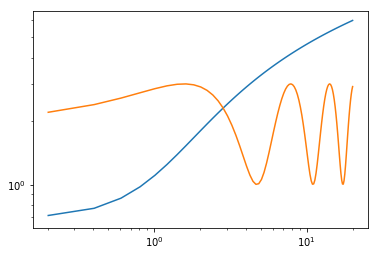

In [5]:
n = 100
X = np.linspace(0, 20, n)
Y1,Y2 = np.log((X)**2+2),  np.sin(X)+2

# semilogx(), semilogy(), or loglog() for both axes
plt.loglog(X,Y1, clip_on=True)
plt.semilogx(X,Y2)

plt.show()

### Plot Style

Often, the thickness of lines, labels, size of plot, detail in the plot need to be adjusted:

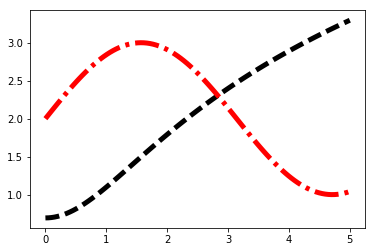

In [6]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

# Add a bit of style to the lines
plt.plot(X,Y1, color='black',linewidth=5, linestyle="dashed")
plt.plot(X,Y2, color='red', linewidth=5, linestyle="-.")

plt.show()

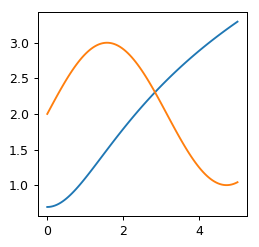

In [7]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

# Define the figure size (inches) and dpi (resolution in dots per inch)
plt.figure(figsize=(3, 3), dpi=90)
plt.plot(X,Y1)
plt.plot(X,Y2)

plt.show()

Label plot, axes, and each plot:

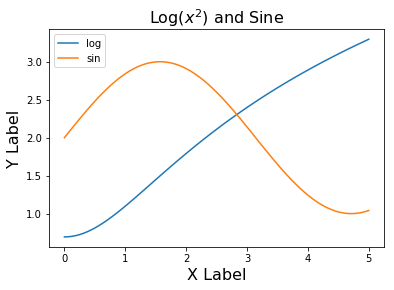

In [8]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

# Label things
plt.plot(X,Y1, label='log')
plt.plot(X,Y2, label='sin')

plt.title('Log($x^2$) and Sine', fontsize=16) # To use Latex, put inside '$'
plt.xlabel('X Label', fontsize=16)
plt.ylabel('Y Label', fontsize=16)

plt.legend(loc='best')

plt.show()

###  Error bars

Represent uncertainty in plot points:

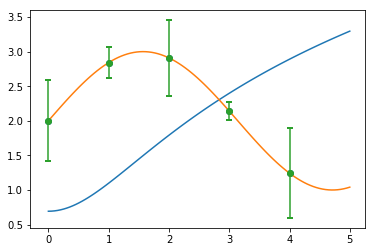

In [9]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

plt.plot(X,Y1)
plt.plot(X,Y2)

# Define scatterplot for error bars
X1 = np.arange(0,5)
Y3 = np.sin(np.arange(0,5))+2
Yerr = np.random.normal(0.5,0.25,5)

plt.scatter(X1 ,Y3)
plt.errorbar(X1, Y3, yerr=Yerr, fmt='o', capsize=3, capthick=2)

plt.show()

### Ticks and tick labels



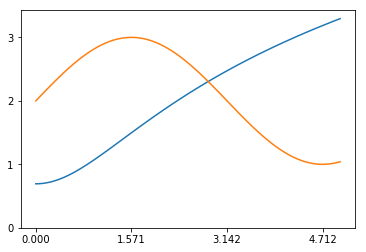

In [10]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

plt.plot(X,Y1)
plt.plot(X,Y2)

# Set the x and y tick values
plt.xticks([0, np.pi/2, np.pi, 3/2*np.pi])
plt.yticks([0, 1, 2, 3])
plt.show()

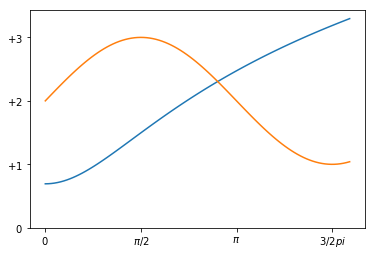

In [11]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

plt.plot(X,Y1)
plt.plot(X,Y2)

# Set both tick values and labels, using Latex to format the labels
plt.xticks([0, np.pi/2, np.pi, 3/2*np.pi],
          [r'$0$', r'$\pi/2$', r'$\pi$', r'3/2$pi$'])

plt.yticks([0, 1, 2, 3],
          [r'$0$', r'$+1$', r'$+2$', r'$+3$'])

plt.show()

## This is better. But the plot borders are still too thin. What about adjusting _ALL_ of the parameters?

matplotlib uses matplotlibrc configuration files to customize all kinds of properties, which are commonly called rc settings or rc parameters. You can control the defaults of almost every property in matplotlib: figure size and dpi, line width, color and style, axes, axis and grid properties, text and font properties and so on.

These will affect all following plots - we're setting global variables. 


In [20]:
# Print a list of all possible rc settings:
mpl.rcParams.keys()[:20] # Just show the first 20

['_internal.classic_mode',
 'agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate',
 'animation.codec',
 'animation.convert_args',
 'animation.convert_path',
 'animation.ffmpeg_args',
 'animation.ffmpeg_path',
 'animation.frame_format',
 'animation.html',
 'animation.mencoder_args',
 'animation.mencoder_path',
 'animation.writer',
 'axes.autolimit_mode',
 'axes.axisbelow',
 'axes.edgecolor',
 'axes.facecolor',
 'axes.formatter.limits']

In [13]:
# Use a variable for width and font to make changes easy.
curr_width = 2.5
curr_font = 12

#Set axes:
mpl.rcParams['axes.linewidth'] = curr_width

#Set Ticks:
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['xtick.major.width'] = curr_width
mpl.rcParams['xtick.labelsize'] = curr_font
mpl.rcParams['ytick.major.width'] = curr_width
mpl.rcParams['ytick.labelsize'] = curr_font

#Set plotted line parameters
mpl.rcParams['lines.linewidth'] = curr_width

# Legend
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = curr_font

Replot the same figure. Note the addition of configuration settings for the labels of the plot:

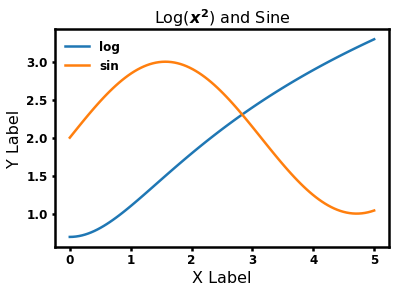

In [14]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

# Label things
plt.plot(X,Y1, label='log')
plt.plot(X,Y2, label='sin')

plt.title('Log($x^2$) and Sine', fontsize=16)
plt.xlabel('X Label', fontsize=16)
plt.ylabel('Y Label', fontsize=16)

plt.legend(loc='best')

plt.show()

In [15]:
# matplotlib rc defaults can be reset via:
mpl.rcdefaults() 

# Automated plot formatting

The matplotlib rc configurations can be inherited from a style setting, or manually edited and copied to the appropriate location.

### Predefined Styles

In [16]:
# What are all the available options?
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'presentation']


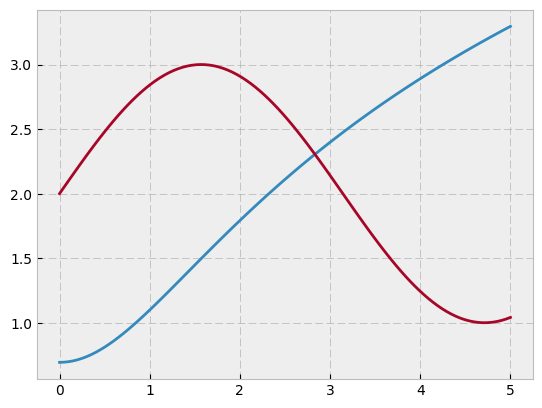

In [17]:
plt.style.use('bmh')

plt.plot(X, Y1)
plt.plot(X, Y2)

plt.show()

mpl.rcdefaults() # Reset matplotlib rc defaults

### Roll your own

A preconfigured plot style saved to ./datafiles is ready to copy into the appropriate location. This file has a _**lot**_ of options in it, only some are uncommented. 

In [23]:
import os
import shutil

# prconfigured style filename and actual name:
style_filename = 'presentation.mplstyle'
style_name = style_filename.rstrip('.mplstyle')

# Create the appropriate directory for matplotlib styles
config_dir = os.path.join(mpl.get_configdir(), 'stylelib')
if not os.path.exists(os.path.join(config_dir,style_filename)):
    os.mkdir(config_dir)

# Copy the style
shutil.copy2(style_filename, config_dir)
mpl.style.core.reload_library() #Reload the style directory

mpl.rcdefaults() # Reset matplotlib rc defaults

# Load the imported style
plt.style.use(style_name)

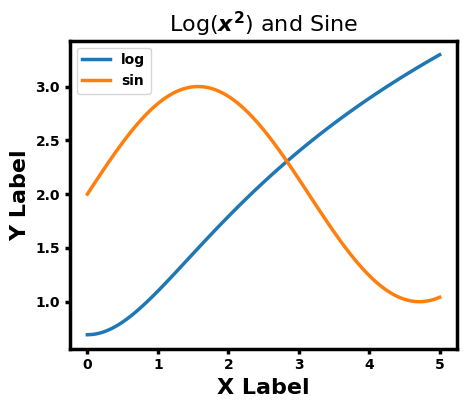

In [24]:
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2

# Label things
plt.plot(X,Y1, label='log')
plt.plot(X,Y2, label='sin')

plt.title('Log($x^2$) and Sine', fontsize=16)
plt.xlabel('X Label', fontsize=16)
plt.ylabel('Y Label', fontsize=16)

plt.legend(loc='best')

plt.show()

# How about inset plots? Stacked plots?

Both of these involve the use of subplots, which are used to differentiate between different plots existing within the same figure.

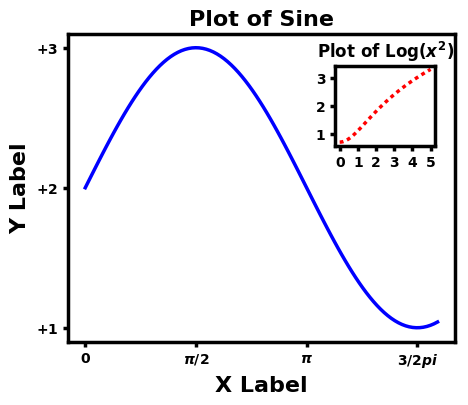

In [25]:
# Inset plot example
fig, axis1 = plt.subplots()

# Subplot location and size are in percentages of the figure size. (0,0 is bottom left)
ins_left, ins_bottom, ins_width, ins_height = [0.66, 0.6, 0.2, 0.2]
axis2 = fig.add_axes([ins_left, ins_bottom, ins_width, ins_height])

#Load the imported style
plt.style.use('presentation')


# Represent data
n = 100
X = np.linspace(0, 5, n)
Y1,Y2 = np.log((X)**2+2), np.sin(X)+2
axis1.plot(X, Y2, color="blue")
axis2.plot(X, Y1, color="red", linestyle='dotted')

# Format the first plot (sca = 'set current axis')
plt.sca(axis1)

# Labels
plt.title('Plot of Sine', fontweight='bold' , fontsize=16)
plt.xlabel('X Label', fontsize=16)
plt.ylabel('Y Label', fontsize=16)

# Setting ticks and tick labels
plt.xticks([0, np.pi/2, np.pi, 3/2*np.pi],
          [r'$0$', r'$\pi/2$', r'$\pi$', r'3/2$pi$'])

plt.yticks([ 1, 2, 3],
          [ r'$+1$', r'$+2$', r'$+3$'])



# -----Format the second subplot (sca = 'set current axis') ----
plt.sca(axis2)

# Labels
plt.title('Plot of Log($x^2$)', fontweight='bold') 

# Setting ticks and tick labels
plt.xticks([ 0,1,2,3,4,5])

plt.show()

Plotting more than one plot in a single figure can be accomplished through gridspec. Gridspec provides a lot of control, and is pretty intuitive. Here, a grid size of n x m sized pixels are specified, and plots are fitted into each sliced plot area.

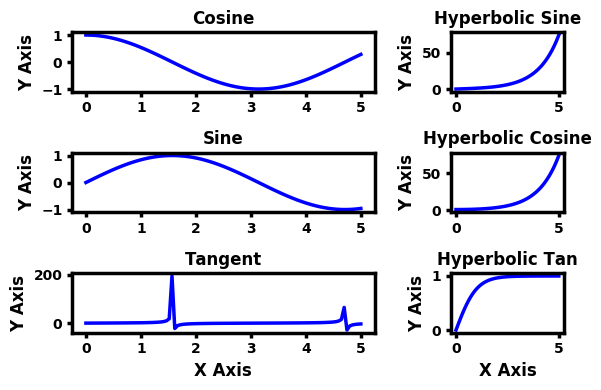

In [26]:
# Subplots example
import matplotlib.gridspec as gridspec

plt.figure(figsize=(6, 4))
G = gridspec.GridSpec(3, 3) #Divide plot area into a 3x3 matrix, but this could be different

# Specify the grid slice to use for each plot (0,0 is top left):
axis1 = plt.subplot(G[0, :2])
axis1.plot(X, np.cos(X), color="blue") # Represent data

axis2 = plt.subplot(G[1, :2])
axis2.plot(X, np.sin(X), color="blue") # Represent data

axis3 = plt.subplot(G[2, :2])
axis3.plot(X, np.tan(X), color="blue") # Represent data

axis4 = plt.subplot(G[0, 2])
axis4.plot(X, np.sinh(X), color="blue") # Represent data

axis5 = plt.subplot(G[1, 2])
axis5.plot(X, np.cosh(X), color="blue") # Represent data

axis6 = plt.subplot(G[2, 2])
axis6.plot(X, np.tanh(X), color="blue") # Represent data

#Format the subplots (sca = 'set current axis')
plt.sca(axis1) 
plt.title('Cosine',fontsize=12, fontweight='bold') 
plt.ylabel('Y Axis', fontsize=12, fontweight='bold')

plt.sca(axis2)
plt.title('Sine',fontsize=12, fontweight='bold') 
plt.ylabel('Y Axis', fontsize=12, fontweight='bold')

plt.sca(axis3)
plt.title('Tangent',fontsize=12, fontweight='bold') 
plt.ylabel('Y Axis', fontsize=12, fontweight='bold')
plt.xlabel('X Axis', fontsize=12, fontweight='bold')

plt.sca(axis4)
plt.title('Hyperbolic Sine',fontsize=12, fontweight='bold') 
plt.ylabel('Y Axis', fontsize=12, fontweight='bold')

plt.sca(axis5)
plt.title('Hyperbolic Cosine',fontsize=12, fontweight='bold') 
plt.ylabel('Y Axis', fontsize=12, fontweight='bold')

plt.sca(axis6)
plt.title('Hyperbolic Tan',fontsize=12, fontweight='bold') 
plt.ylabel('Y Axis', fontsize=12, fontweight='bold')
plt.xlabel('X Axis', fontsize=12, fontweight='bold')

#Load the imported style
plt.style.use('presentation')

plt.tight_layout() #Adjusts plot size to fit labels, etc.

plt.show()

# How about some other types of plots?

In [27]:
mpl.rcdefaults() # Reset matplotlib rc defaults

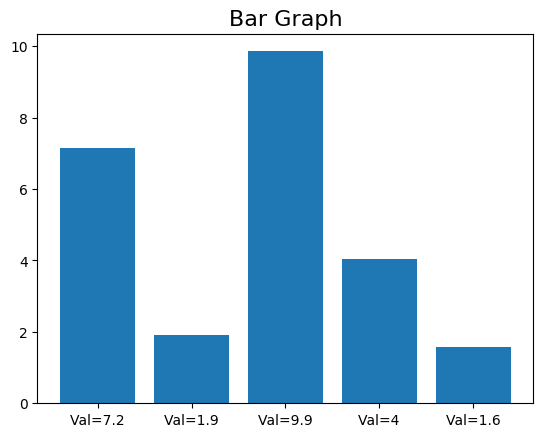

In [28]:
# Bar Graph
n = 100
X = np.arange(0, 5)
Y = np.random.rand(5)*10
labels = ['Val=%0.2g' % n for n in Y]


plt.bar(X,Y)
plt.title('Bar Graph',fontsize=16)
plt.xticks(X,labels)

plt.show()

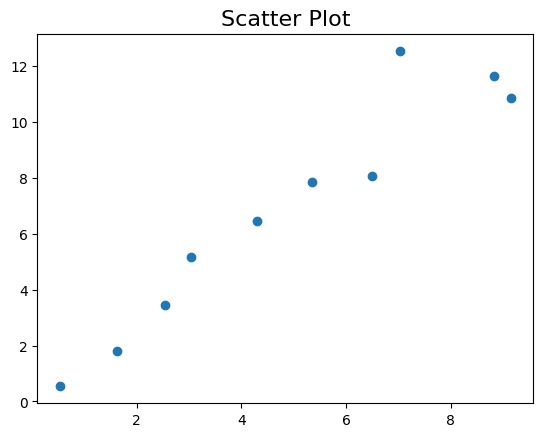

In [29]:
# Scatter plot
n = 10
X = np.arange(n)+np.random.rand(n)
Y = X+np.random.rand(n)*np.arange(n)

plt.scatter(X,Y)
plt.title('Scatter Plot',fontsize=16)

plt.show()

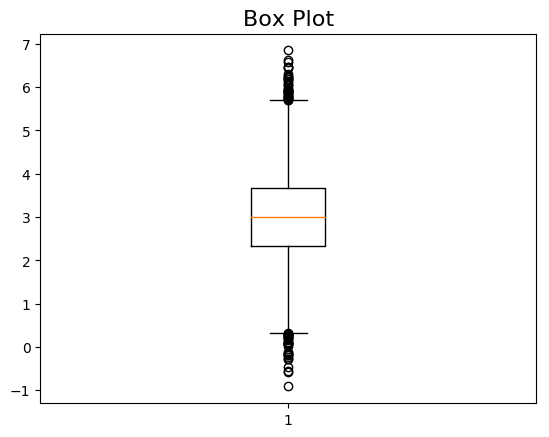

In [30]:
# Box plot (Box-whisker plot)
n=10000
Y = np.random.normal(loc=3, scale=1, size=n)

plt.boxplot(Y)
plt.title('Box Plot',fontsize=16)

plt.show()

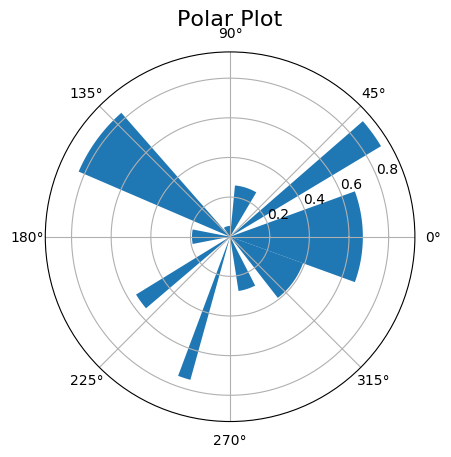

In [34]:
# Polar plot
n = 10
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / n)
radii =  np.random.rand(n)
width = 3*np.pi/n * np.random.rand(n)

ax = plt.axes(polar=True)
bars = plt.bar(theta, radii, width=width)

plt.title('Polar Plot',fontsize=16)
    
plt.show()

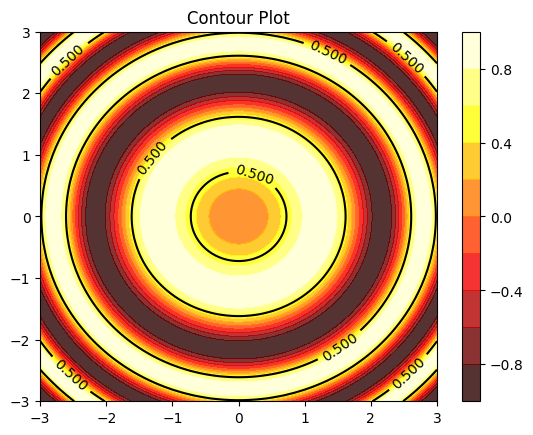

In [35]:
# Contour Plot
def f(x, y):
    return np.sin((x)**2 + y**2)

n = 128
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, f(X, Y), 10, alpha=.8, cmap='hot')

plt.title('Contour Plot')
plt.colorbar()
C = plt.contour(X, Y, f(X, Y), 2, colors='black', linewidth=.5, levels=[0.5])
C.clabel()

plt.show()

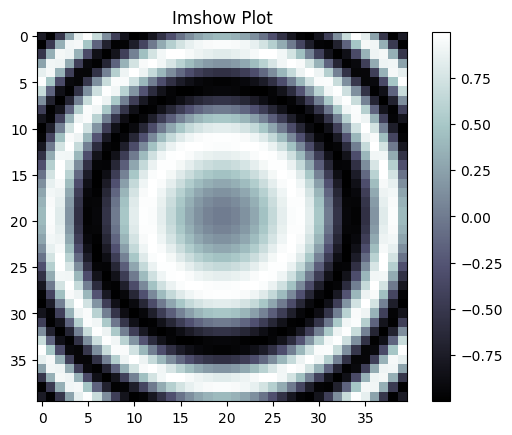

In [36]:
# Imshow Plot
n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 4 * n)
X, Y = np.meshgrid(x, y)

plt.title('Imshow Plot')
plt.imshow(f(X, Y), cmap='bone')
plt.colorbar()

plt.show()

## 3D Plots

In [37]:
# Python loads
from mpl_toolkits.mplot3d import Axes3D

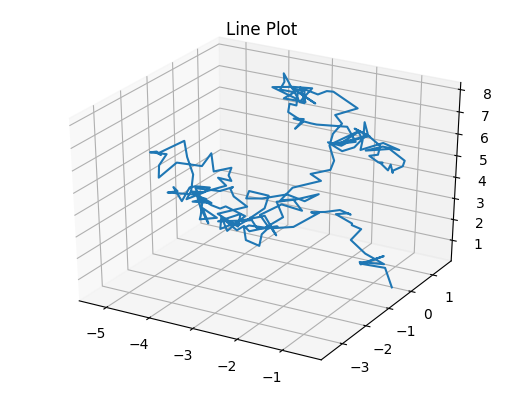

In [38]:
# Line Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data
n = 200
X = np.cumsum(np.random.rand(200)-0.5)
Y = np.cumsum(np.random.rand(200)-0.5)
Z = np.cumsum(np.random.rand(200)-0.5)

# Plot Data
ax.plot(X, Y, Z)

#Customize
plt.title('Line Plot')

plt.show()

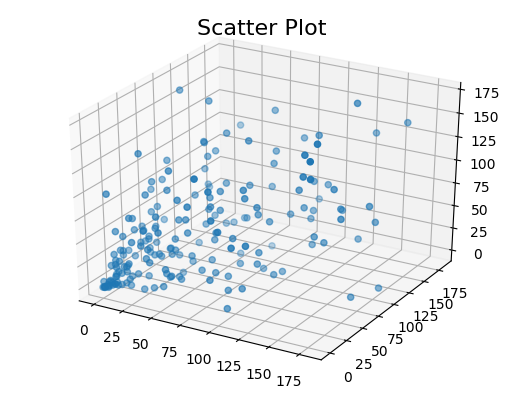

In [39]:
# Scatter plot
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data
n = 200
X = np.random.rand(n)*np.arange(n)
Y = np.random.rand(n)*np.arange(n)
Z = np.random.rand(n)*np.arange(n)

# Plot Data
ax.scatter(X,Y,Z)

#Customize
plt.title('Scatter Plot',fontsize=16)

plt.show()

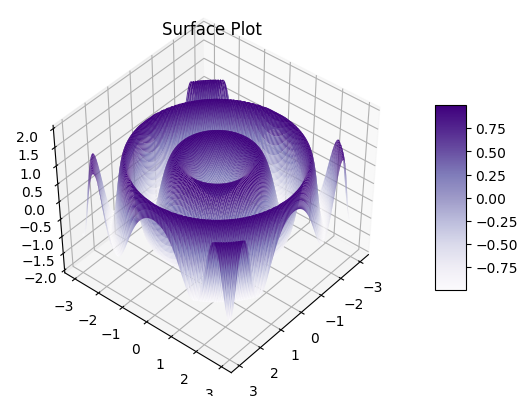

In [40]:
# Surface Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data
def f(x, y):
    return np.sin((x)**2 + y**2)
X = np.arange(-3, 3, 0.05)
Y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot data
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.Purples)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=6)

#Customize
plt.title('Surface Plot')
ax.set_zlim(-2, 2)
ax.view_init(45, 40) #Set view angle

plt.show()